In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [283]:
train_data = pd.read_csv("data/Train_BigmartSale.csv")

In [284]:
test_data = pd.read_csv("data/Test_BigmartSale.csv")

In [285]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [286]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [287]:
train_data.shape, test_data.shape

((8523, 12), (5681, 11))

In [288]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [289]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Data Exploration:

In [290]:
combined_data = train_data.append(test_data)

In [291]:
combined_data.shape

(14204, 12)

In [292]:
combined_data.drop("Item_Outlet_Sales",axis =1, inplace = True)

In [293]:
combined_data.shape

(14204, 11)

In [294]:
combined_data.describe()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,0.065953,12.792854,1997.830681
std,62.086938,0.051459,4.652502,8.371664
min,31.290000,0.000000,4.555000,1985.000000
25%,94.012000,0.027036,8.710000,1987.000000
50%,142.247000,0.054021,12.600000,1999.000000
75%,185.855600,0.094037,16.750000,2004.000000
max,266.888400,0.328391,21.350000,2009.000000


In [295]:
combined_data.describe(include = ['O'])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204,14204,14204,14204,14204,10188,14204
unique,5,1559,16,10,3,3,4
top,Low Fat,FDH48,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1
freq,8485,10,2013,1559,5583,4655,9294


In [296]:
categorical_cols = [x for x in combined_data.dtypes.index if combined_data.dtypes[x]=="object"]

In [297]:
categorical_cols

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [298]:
numeric_cols = [x for x in combined_data.dtypes.index if combined_data.dtypes[x]!="object"]

In [299]:
numeric_cols

['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year']

In [300]:
categorical_cols.remove('Item_Identifier')

In [301]:
combined_data[categorical_cols].nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Location_Type     3
Outlet_Size              3
Outlet_Type              4
dtype: int64

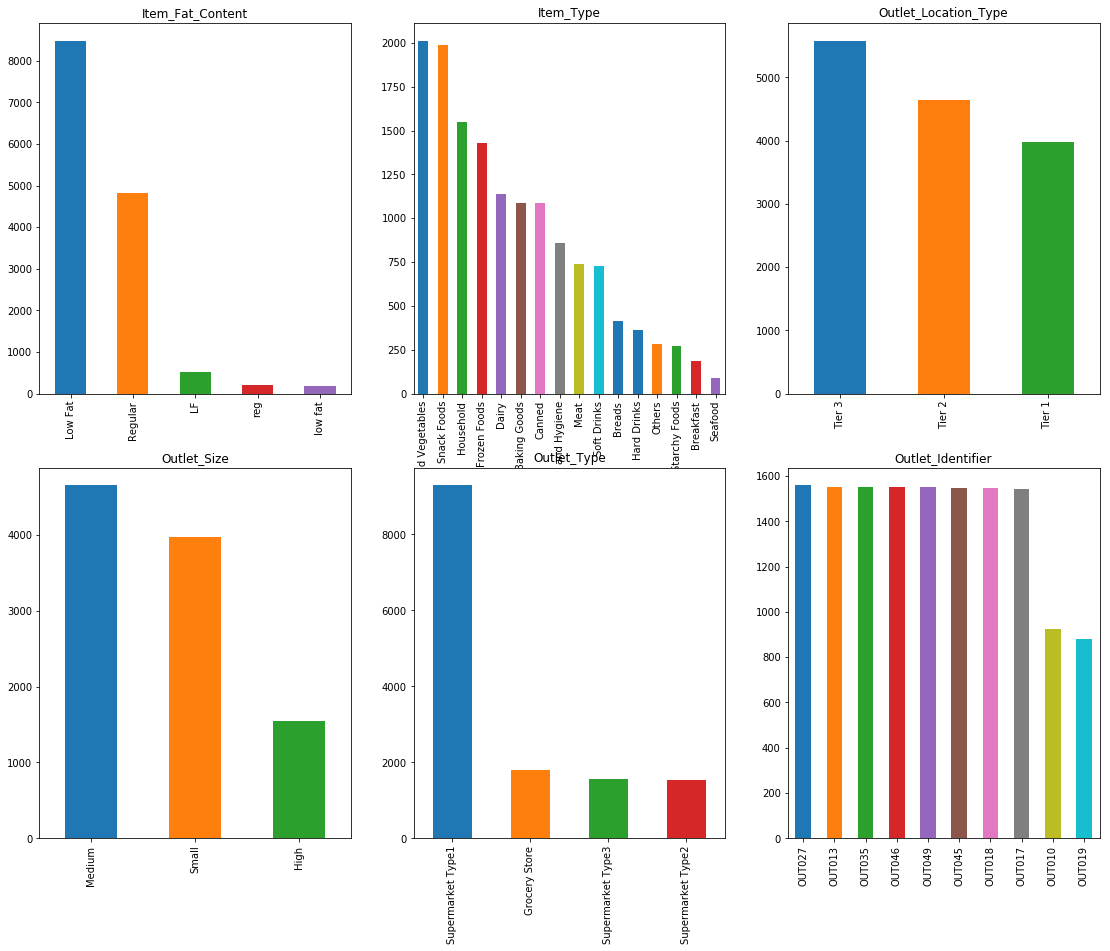

In [302]:
f,ax = plt.subplots(2,3,figsize=(19,15))
combined_data["Item_Fat_Content"].value_counts().plot.bar(ax=ax[0,0],title ="Item_Fat_Content")
combined_data["Item_Type"].value_counts().plot.bar(ax=ax[0,1],title="Item_Type")
combined_data['Outlet_Location_Type'].value_counts().plot.bar(ax=ax[0,2],title="Outlet_Location_Type")
combined_data['Outlet_Size'].value_counts().plot.bar(ax=ax[1,0],title ="Outlet_Size") 
combined_data["Outlet_Type"].value_counts().plot.bar(ax=ax[1,1],title = "Outlet_Type")
combined_data['Outlet_Identifier'].value_counts().plot.bar(ax=ax[1,2],title='Outlet_Identifier')


### Analysis of Target Varaible:

In [303]:
from scipy import stats

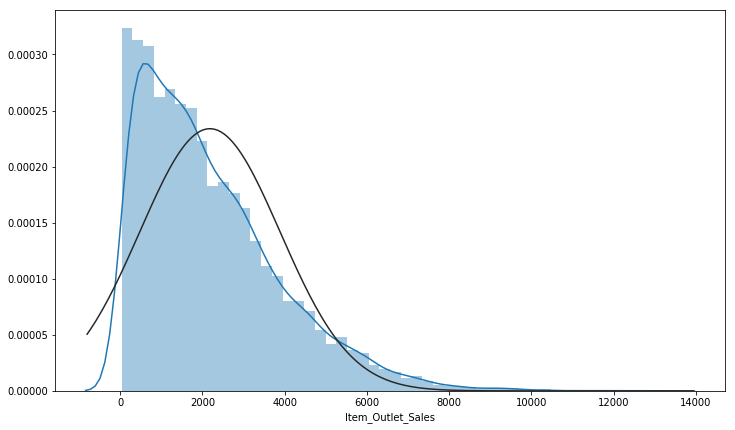

In [304]:
plt.figure(figsize=(12,7))
sns.distplot(train_data["Item_Outlet_Sales"],fit = stats.norm)

In [305]:
train_data['Item_Outlet_Sales'] = np.log1p(train_data['Item_Outlet_Sales'])

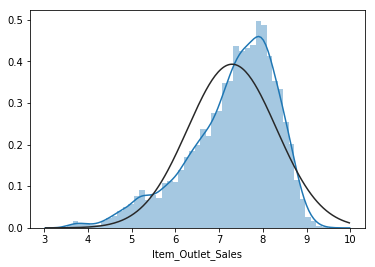

In [306]:
sns.distplot(train_data["Item_Outlet_Sales"],fit = stats.norm)

### Data Cleaning:

In [307]:
combined_data['Item_Weight'].isnull().sum()

2439

In [308]:
combined_data['Item_Weight'].fillna(combined_data['Item_Weight'].mean(), inplace=True)

In [309]:
combined_data['Item_Weight'].isnull().sum()

0

In [310]:
combined_data['Outlet_Size'].isnull().sum()

4016

In [311]:
from scipy.stats import mode

In [312]:
combined_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [313]:
combined_data["Outlet_Size"].fillna("Medium", inplace = True)
print(combined_data["Outlet_Size"].isnull().sum())

0


In [314]:
combined_data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

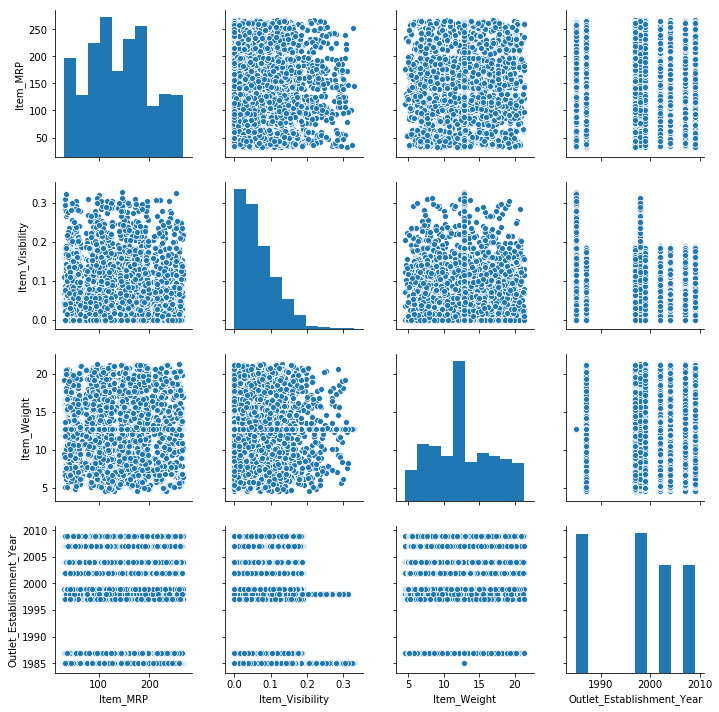

In [315]:
sns.pairplot(combined_data[numeric_cols])

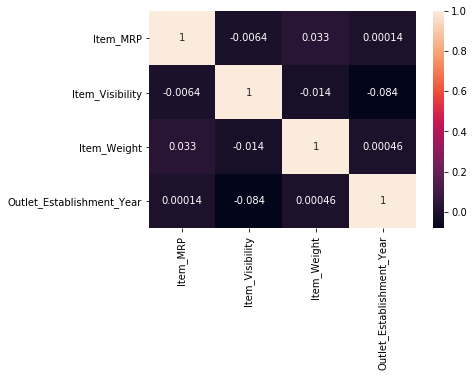

In [316]:
sns.heatmap(combined_data[numeric_cols].corr(),annot=True)

### Feature Engineering:

In [317]:
missing_bool =(combined_data['Item_Visibility']==0)
print(missing_bool.sum())
combined_data.loc[missing_bool,'Item_Visibility'] = combined_data['Item_Visibility'].mean()
missing_bool =(combined_data['Item_Visibility']==0)
print(missing_bool.sum())

879
0


In [318]:
combined_data['Item_Type_Category'] = combined_data['Item_Identifier'].apply(lambda x: x[0:2])
combined_data['Item_Type_Category'] = combined_data['Item_Type_Category'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
combined_data['Item_Type_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Category, dtype: int64

In [319]:
print(combined_data['Item_Fat_Content'].value_counts())
combined_data['Item_Fat_Content'] = combined_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(combined_data['Item_Fat_Content'].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [320]:
combined_data.loc[combined_data['Item_Type_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
combined_data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [321]:
combined_data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Category
0,Low Fat,FDA15,249.8092,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
1,Regular,DRC01,48.2692,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks
2,Low Fat,FDN15,141.6180,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
3,Regular,FDX07,182.0950,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Food
4,Non-Edible,NCD19,53.8614,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable


In [322]:
combined_data.drop(["Item_Identifier","Outlet_Establishment_Year","Item_Type"],axis = 1,inplace=True)


In [323]:
combined_data = pd.get_dummies(combined_data, columns = ["Item_Fat_Content","Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type","Item_Type_Category" ],drop_first=True)
combined_data.head()

,Item_MRP,Item_Visibility,Item_Weight,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Category_Food,Item_Type_Category_Non-Consumable
0,249.8092,0.016047,9.30,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,48.2692,0.019278,5.92,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
2,141.6180,0.016760,17.50,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,182.0950,0.065953,19.20,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,53.8614,0.065953,8.93,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [324]:
combined_data.dtypes

Item_MRP                             float64
Item_Visibility                      float64
Item_Weight                          float64
Item_Fat_Content_Non-Edible            uint8
Item_Fat_Content_Regular               uint8
Outlet_Identifier_OUT013               uint8
Outlet_Identifier_OUT017               uint8
Outlet_Identifier_OUT018               uint8
Outlet_Identifier_OUT019               uint8
Outlet_Identifier_OUT027               uint8
Outlet_Identifier_OUT035               uint8
Outlet_Identifier_OUT045               uint8
Outlet_Identifier_OUT046               uint8
Outlet_Identifier_OUT049               uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Category_Food                uint8
Item_Type_

In [325]:
X= combined_data[:train_data.shape[0]]

In [326]:
test = combined_data[train_data.shape[0]:]

In [327]:
Y = train_data["Item_Outlet_Sales"]

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

#### 1.Linear Regression:

In [335]:
from sklearn.linear_model import LinearRegression

In [336]:
model =  LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.7077596848113163

In [337]:
y_pred = model.predict(X_test)

In [333]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [338]:
print("R2 score :",r2_score(y_test, y_pred))
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print('mse :' ,mse)

R2 score : 0.7077596848113163
mse : 0.5444324575271076


In [339]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,Y,cv=10)
score.mean()

0.7183414642697241

#### 2.Ridge Regression:

In [340]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [341]:
ridge = Ridge()
MSEs = cross_val_score(ridge, X, Y, cv=5)
print(MSEs)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

[0.72126931 0.71073909 0.70745488 0.71543973 0.74006624]
0.7189938496720159


#### 3.Decision Tree:

In [342]:
from sklearn.tree import DecisionTreeRegressor

In [343]:
decision_regressor = DecisionTreeRegressor(random_state = 0)
decision_regressor.fit(X,Y)
#decision_regressor.score(X,Y)
y_pred = decision_regressor.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
dtr_score=np.sqrt(mse)
dtr_score

7.3069178177364825e-06

In [344]:
score=cross_val_score(decision_regressor,X,Y,cv=10)
score.mean()



0.4619166731608872

#### 4.Random Forest:

In [345]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
model.fit(X,Y)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
cv_score = cross_val_score(model, X, Y, cv=5)
cv_score.mean()

0.6417177345277887

#### 5.Bagging Resgression:

In [346]:
from sklearn.ensemble import BaggingRegressor
Br = BaggingRegressor(max_samples = 70)
Br.fit(X_train,y_train)
y_predict = Br.predict(X_test)

In [347]:
Br.score(X_test,y_test)

0.5343049608218804

In [348]:
cross_val_score(Br,X,Y,cv=10).mean()

0.5365498234612741

#### 6.AdaBoost regressor:

In [349]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X,Y)
y_predict=ada.predict(X_test)
ada.score(X_test,y_test)


0.586236154969201

In [350]:
cross_val_score(ada,X,Y,cv = 10).mean()

0.5938425337665246

#### 7.Gradient Boosting:

In [351]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X,Y)
y_predict=gbr.predict(X_test)
gbr.score(X_test,y_test)


0.73918630844401

In [352]:
cross_val_score(gbr,X,Y,cv=10).mean()

0.732423898223211

In [353]:
from sklearn.feature_selection import RFE
rfe = RFE(gbr, 10)
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False False False False  True  True  True False False
 False False False False False  True  True  True  True False False]
[ 1  1  1  9  8  4 10  1  1  1 13  6  3 12  2  5 14  1  1  1  1  7 11]


In [354]:
importances = gbr.feature_importances_
indices = np.argsort(importances)

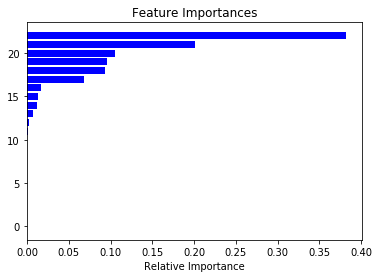

In [355]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.show()

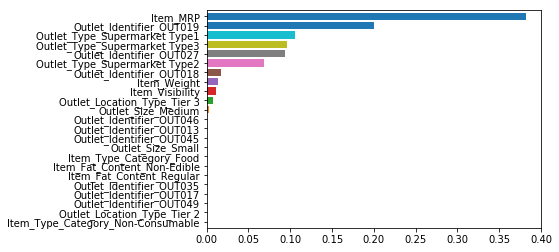

In [356]:
pd.Series(gbr.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)